In [2]:
!pip install diagrams

     |████████████████████████████████| 15.2MB 306kB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=d146f2188fc3da6111396b4bbfa96f6dbd4926e180116505e90574ad5a136612
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


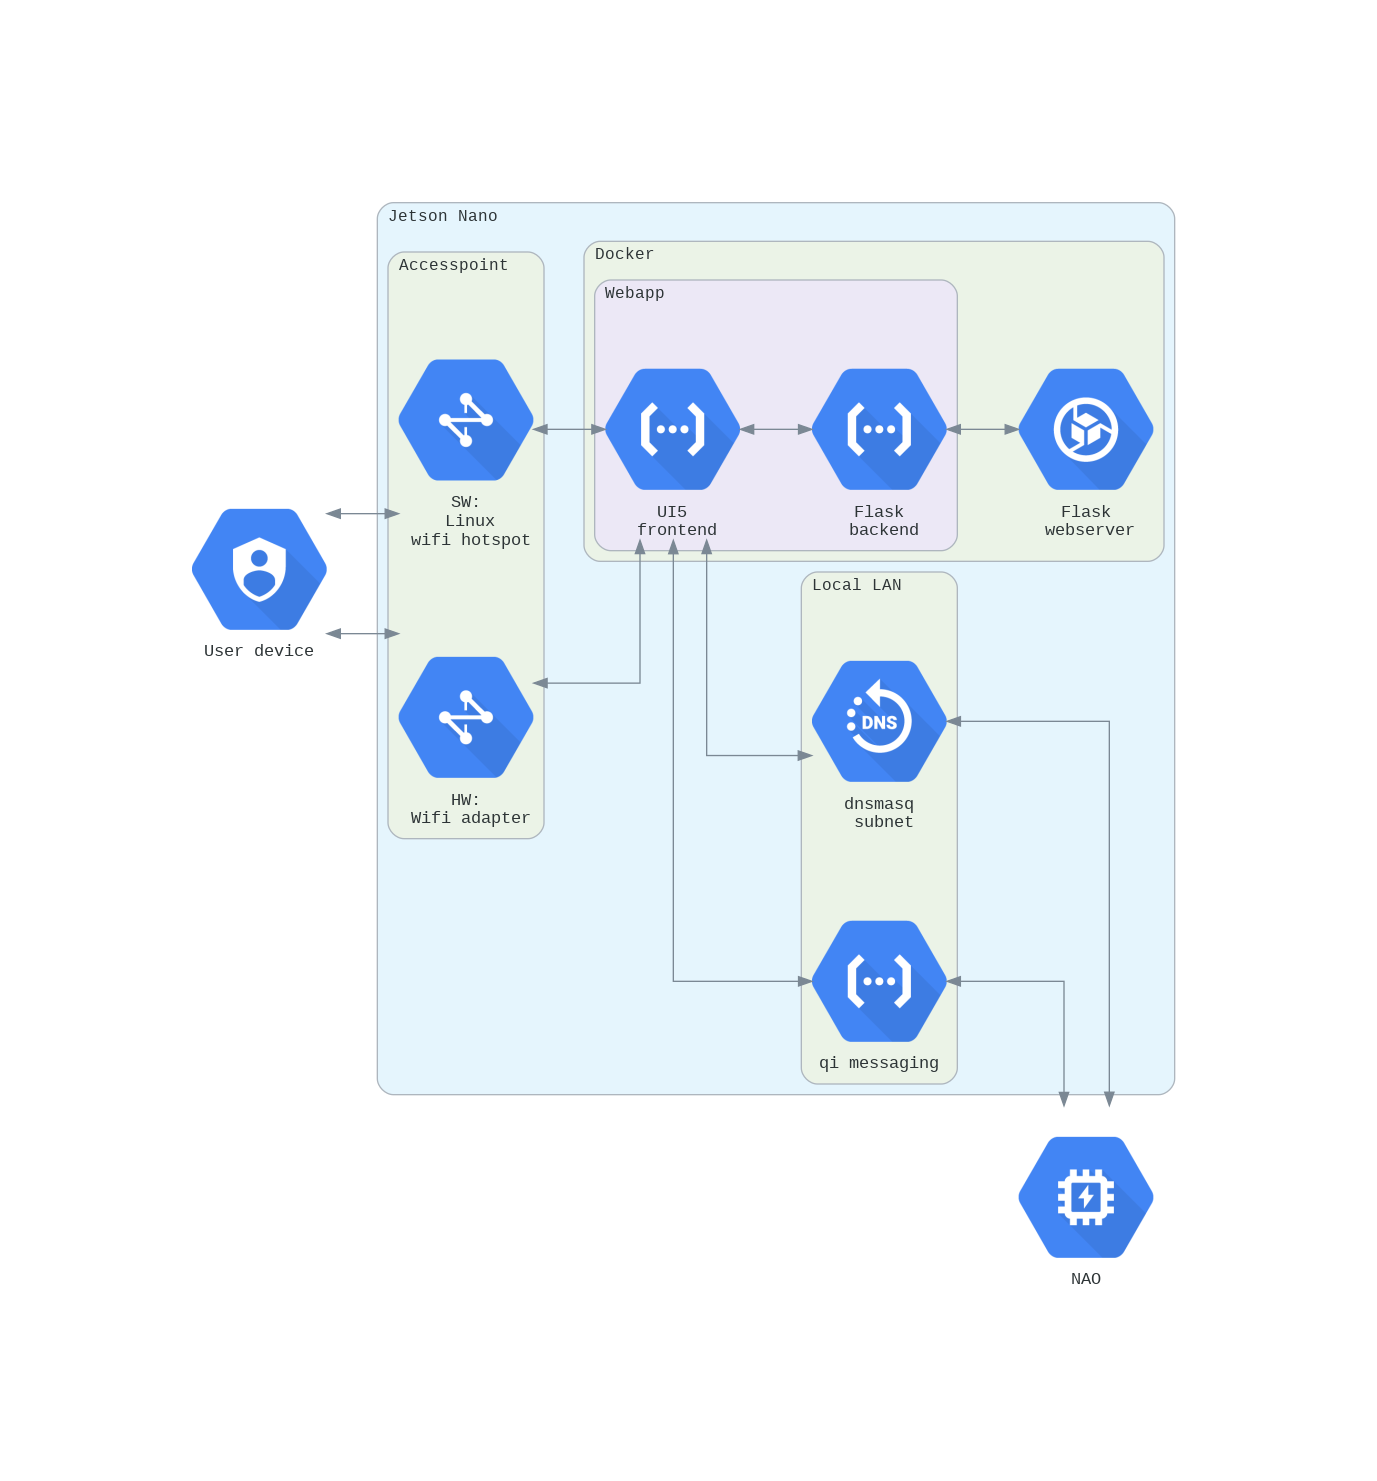

In [7]:
from diagrams import Cluster, Diagram, Edge
from diagrams.gcp.analytics import *
from diagrams.gcp.compute import *
from diagrams.gcp.database import *
from diagrams.gcp.devtools import *
from diagrams.gcp.iot import *
from diagrams.gcp.migration import *
from diagrams.gcp.ml import *
from diagrams.gcp.network import *
from diagrams.gcp.security import *
from diagrams.gcp.storage import *


with Diagram() as diag:

  entry = ResourceManager("User device")

  with Cluster("Jetson Nano"):
      with Cluster("Accesspoint"):
          sw = Network("SW:\n Linux\n wifi hotspot")
          hw = Network("HW:\n Wifi adapter")
          
      with Cluster("Docker"):
          with Cluster("Webapp"):
              front = Functions("UI5\n frontend")
              back = Functions("Flask\n backend")
          webserver = ContainerOptimizedOS("Flask\n webserver")
      with Cluster("Local LAN"):
              masq = DNS("dnsmasq\n subnet")
              qimsg = Functions("qi messaging")

  nao = GPU("NAO")

  entry >> Edge() << [sw, hw] >> Edge() << front >> Edge() << back >> Edge() << webserver
  #[sw, hw] >> entry
  #front >> [sw, hw]
  #back >> front
  #webserver >> back
  front >> Edge() << [masq, qimsg] >> Edge() << nao
  #[masq, qimsg] >> front
  #nao >> [masq, qimsg]

diag